## 1. Início do Pré-processamento

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.ensemble import BalancedRandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler




In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Gender: Whether the customer is a male or a female


SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)


Partner: Whether the customer has a partner or not (Yes, No)


Dependents: Whether the customer has dependents or not (Yes, No)


Tenure: Number of months the customer has stayed with the company


PhoneService: Whether the customer has a phone service or not (Yes, No)


MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)


InternetService: Customer’s internet service provider (DSL, Fiber optic, No)


OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)

In [4]:
#Verificando tipos das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#Verificando quantidade de linhas e colunas
print(f'Entradas: {df.shape[0]}')
print(f'Colunas: {df.shape[1]}')

Entradas: 7043
Colunas: 21


In [6]:
#Verificando se há valores nulos
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
#Análise estatística das variáveis numéricas
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
#Exclusão da coluna ID por não acrescentar informação
df = df.drop(columns=['customerID'])

## 2. Análise Exploratória das variáveis 


Obs. SeniorCitizen não é uma variável categórica, mas só possui dois valores representando se é um cidadão idoso(1) ou não(0), então foi considerada nessa primeira análise de variáveis categórias.

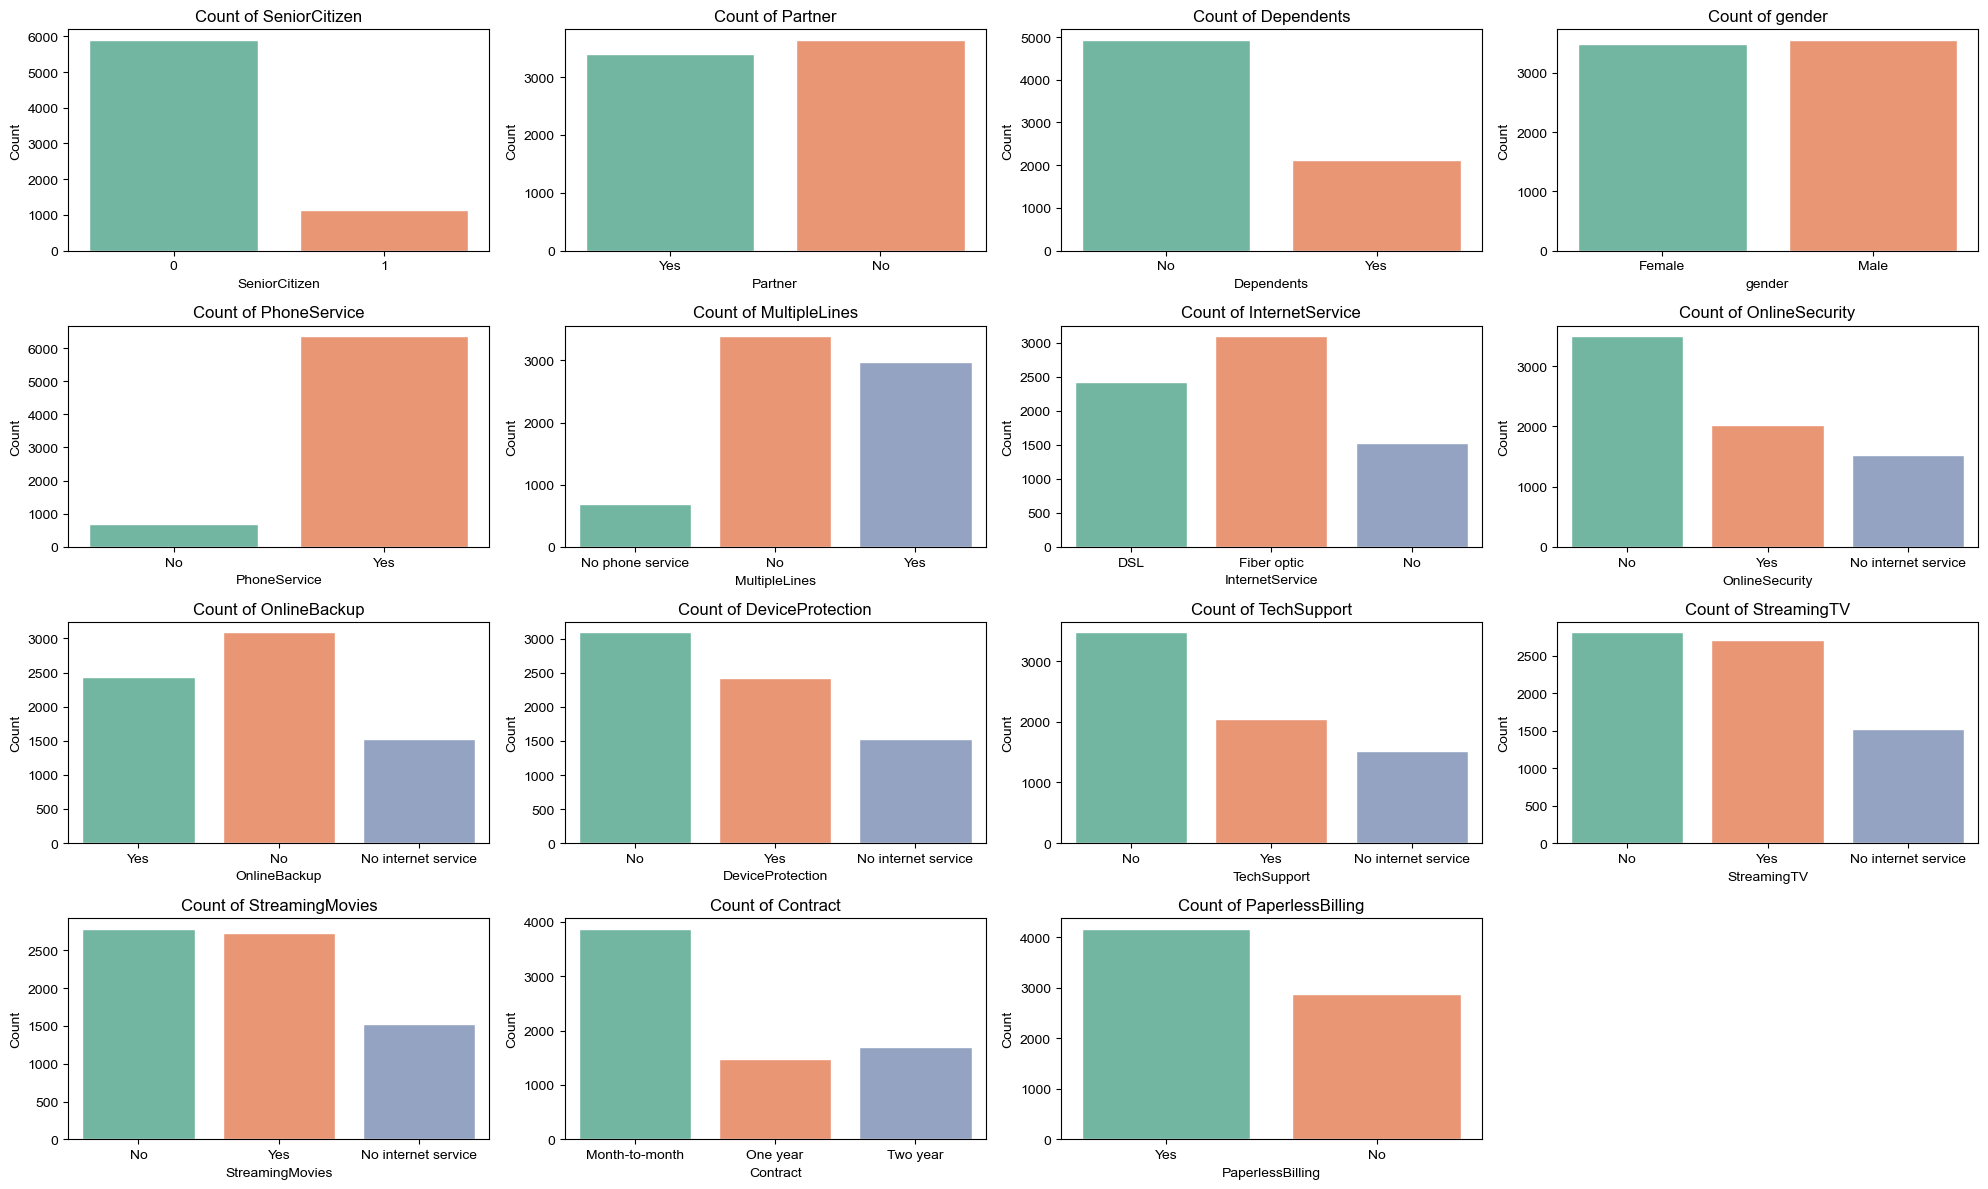

In [9]:
columns_to_plot = ['SeniorCitizen', 'Partner', 'Dependents', 'gender', 'PhoneService',
                   'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                   ]


# Calcular o número de linhas e colunas baseado no total de variáveis
num_cols = 4  # Definindo 4 colunas
num_rows = (len(columns_to_plot) + num_cols - 1) // num_cols  # Número de linhas necessárias

# Configurando a grade de subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 12))

# Configurando o estilo do grid
sns.set_style("darkgrid", {"grid.color": ".5", "grid.linestyle": ":"})
# Usando a paleta 'Set2'
sns.set_palette("Set2")

# Gerar os gráficos para cada variável
for i, column in enumerate(columns_to_plot):
    ax = axes[i // num_cols, i % num_cols]  # Posicionar na grade
    sns.countplot(x=column, data=df, ax=ax)
    ax.set_title(f'Count of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

# Remover eixos não usados (caso o número de gráficos não complete a grade)
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes.flatten()[j])

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()

Nesta visualização acima, podemos verificar a quantidade de clientes que possuem cada serviço. Essa visualização auxilia na tomada de decisão para qual serviço está mais requisitado ou está caindo em desuso.

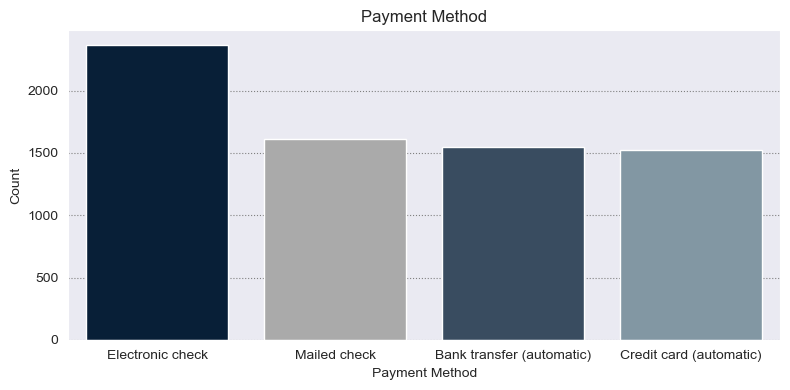

In [10]:
fig, ax = plt.subplots(figsize = (8, 4))
sns.set_style("darkgrid", {"grid.color": ".5", "grid.linestyle": ":"})
# Definindo a paleta de cores
colors = ["#001F3F", "#AAAAAA", "#334C66", "#7D99A8", "#D0D0D0"]
sns.set_palette(sns.color_palette(colors))
count = df['PaymentMethod'].value_counts
sns.countplot(x='PaymentMethod', data = df)
ax.set_xlabel("Payment Method")
ax.set_ylabel("Count")
ax.set_title("Payment Method")
plt.tight_layout();

Este gráfico acima foi plotado fora da visualização com todos os demais gráficos pois possui valores com nomes extensos, então, foi necessário plotar separadamente. Verifica-se então, que o método de pagamento mais utilizado é o cheque eletrônico. 

### Análise de variáveis categóricas

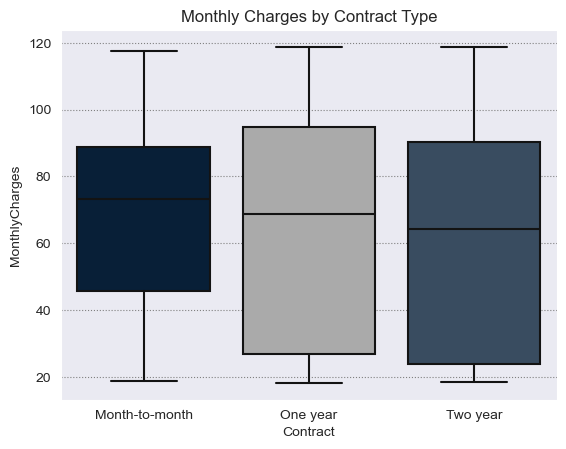

In [11]:
sns.boxplot(x='Contract', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Contract Type')
plt.show()


Aqui, podemos perceber a relação entre o tipo de contrato, e a quantidade de pagamento mensal. 

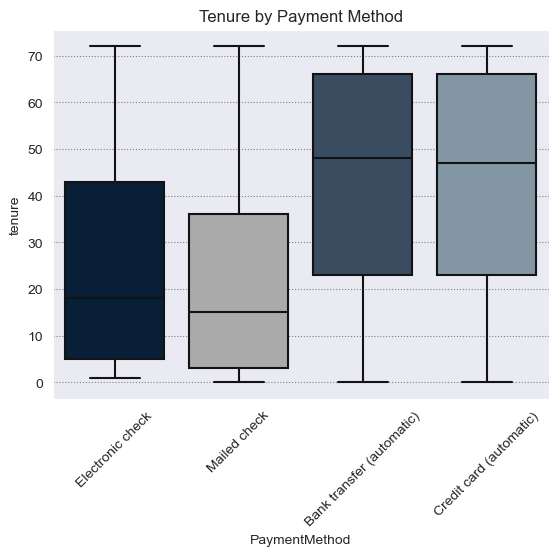

In [12]:
sns.boxplot(x='PaymentMethod', y='tenure', data=df)
plt.title('Tenure by Payment Method')
plt.xticks(rotation=45)
plt.show()

Neste gráfico, podemos perceber o tipo de pagamento relacionado com os meses de contrato. Podemos perceber que a maior permanência de contrato acontece em transferências automáticas e no cartão de crédito (também automático).

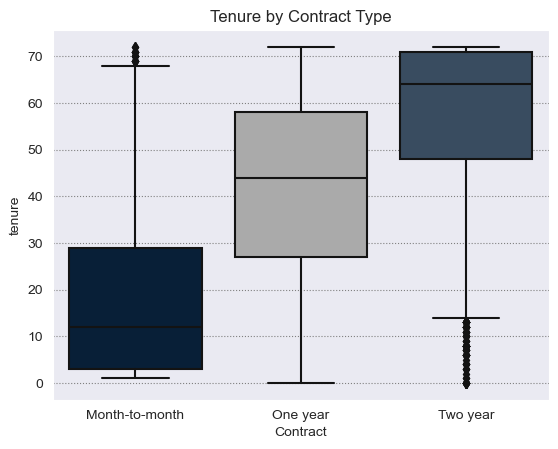

In [13]:
sns.boxplot(x='Contract', y='tenure', data=df)
plt.title('Tenure by Contract Type')
plt.show()

Aqui, podemos perceber que a maior permanência de contrato em meses acontece em contratos de 2 anos. 

### Analisando as variáveis com a target Churn

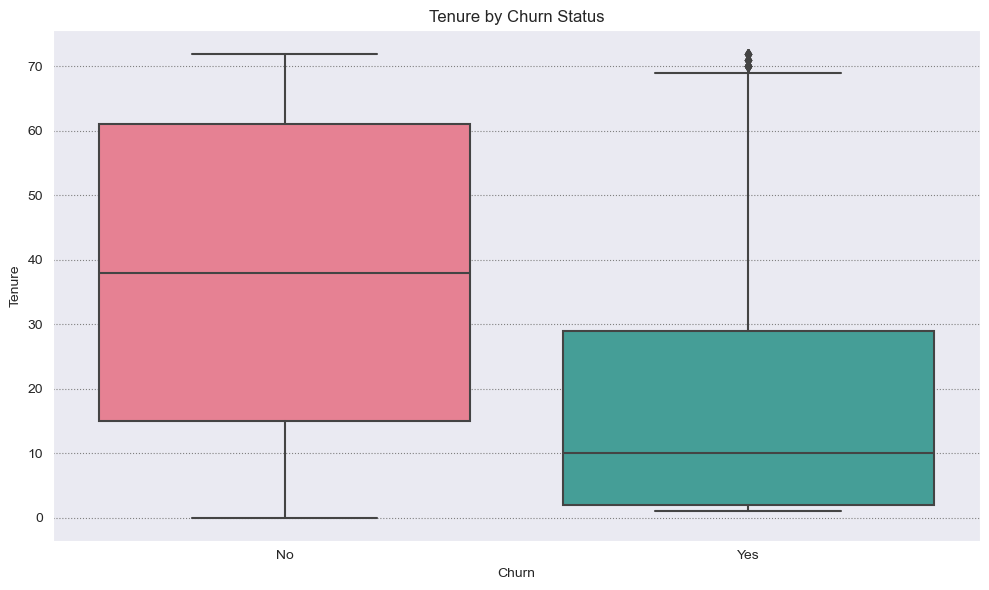

In [14]:
# Definir o estilo dos gráficos
sns.set_style("darkgrid", {"grid.color": ".5", "grid.linestyle": ":"})

# Criar o boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=df, palette='husl')

# Adicionar título e rótulos
plt.title('Tenure by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Tenure')

# Exibir o gráfico
plt.tight_layout()
plt.show()

Neste gráfico, percebe-se que quanto mais meses a pessoa permanece com contrato, maior é a chance de ela não dar Churn.

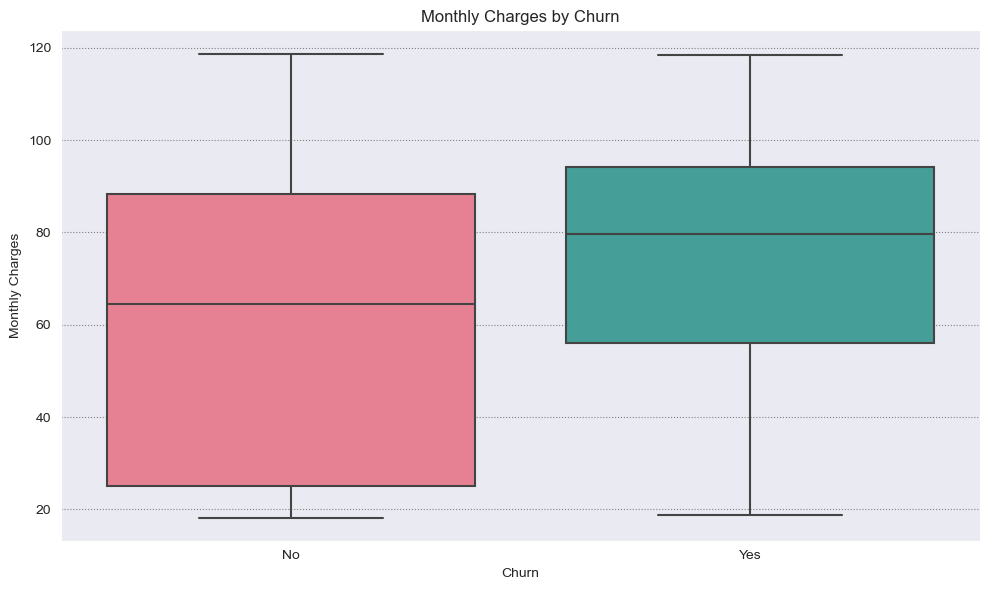

In [15]:
# Definir o estilo dos gráficos
sns.set_style("darkgrid", {"grid.color": ".5", "grid.linestyle": ":"})

# Criar o boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='husl')

# Adicionar título e rótulos
plt.title('Monthly Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')

# Exibir o gráfico
plt.tight_layout()
plt.show()

Aqui, percebemos que quanto maior a cobrança mensal, maior a chance da pessoa dar Churn. 

In [16]:
# Tranformação da coluna TotalCharges para numérica, quando essa transformação é feita, alguns valores não numéricos que existiam nela se transformam em valores nulos
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [17]:
# Definindo o valor da média da coluna para preencher os nulos
mean_total_charges = df['TotalCharges'].mean()


In [18]:
# Preencher os valores nulos com a média
df['TotalCharges'].fillna(mean_total_charges, inplace=True)


C:\Users\samsung\AppData\Local\Temp\ipykernel_12416\2804322498.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(mean_total_charges, inplace=True)


In [19]:
# Transformando a coluna Senior Citizen em int
df['SeniorCitizen'] = df['SeniorCitizen'].astype(int)

In [20]:
#Verificação
df['SeniorCitizen'].dtype

dtype('int32')

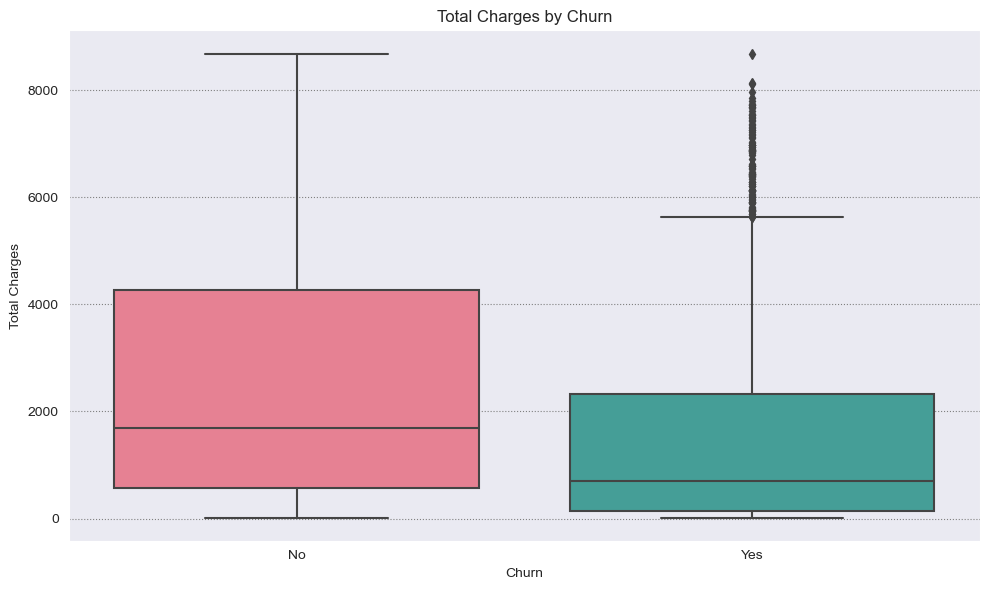

In [21]:
# Definir o estilo dos gráficos
sns.set_style("darkgrid", {"grid.color": ".5", "grid.linestyle": ":"})

# Criar o boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='TotalCharges', data=df, palette='husl')

# Adicionar título e rótulos
plt.title('Total Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Total Charges')

#Exibir o gráfico
plt.tight_layout()
plt.show()

Aqui, agora podemos analisar que valores maiores para cobranças totais tem uma maior chance para o cliente não abandonar. Isso deve ocorrer devido ao tempo de permanência com a empresa. 

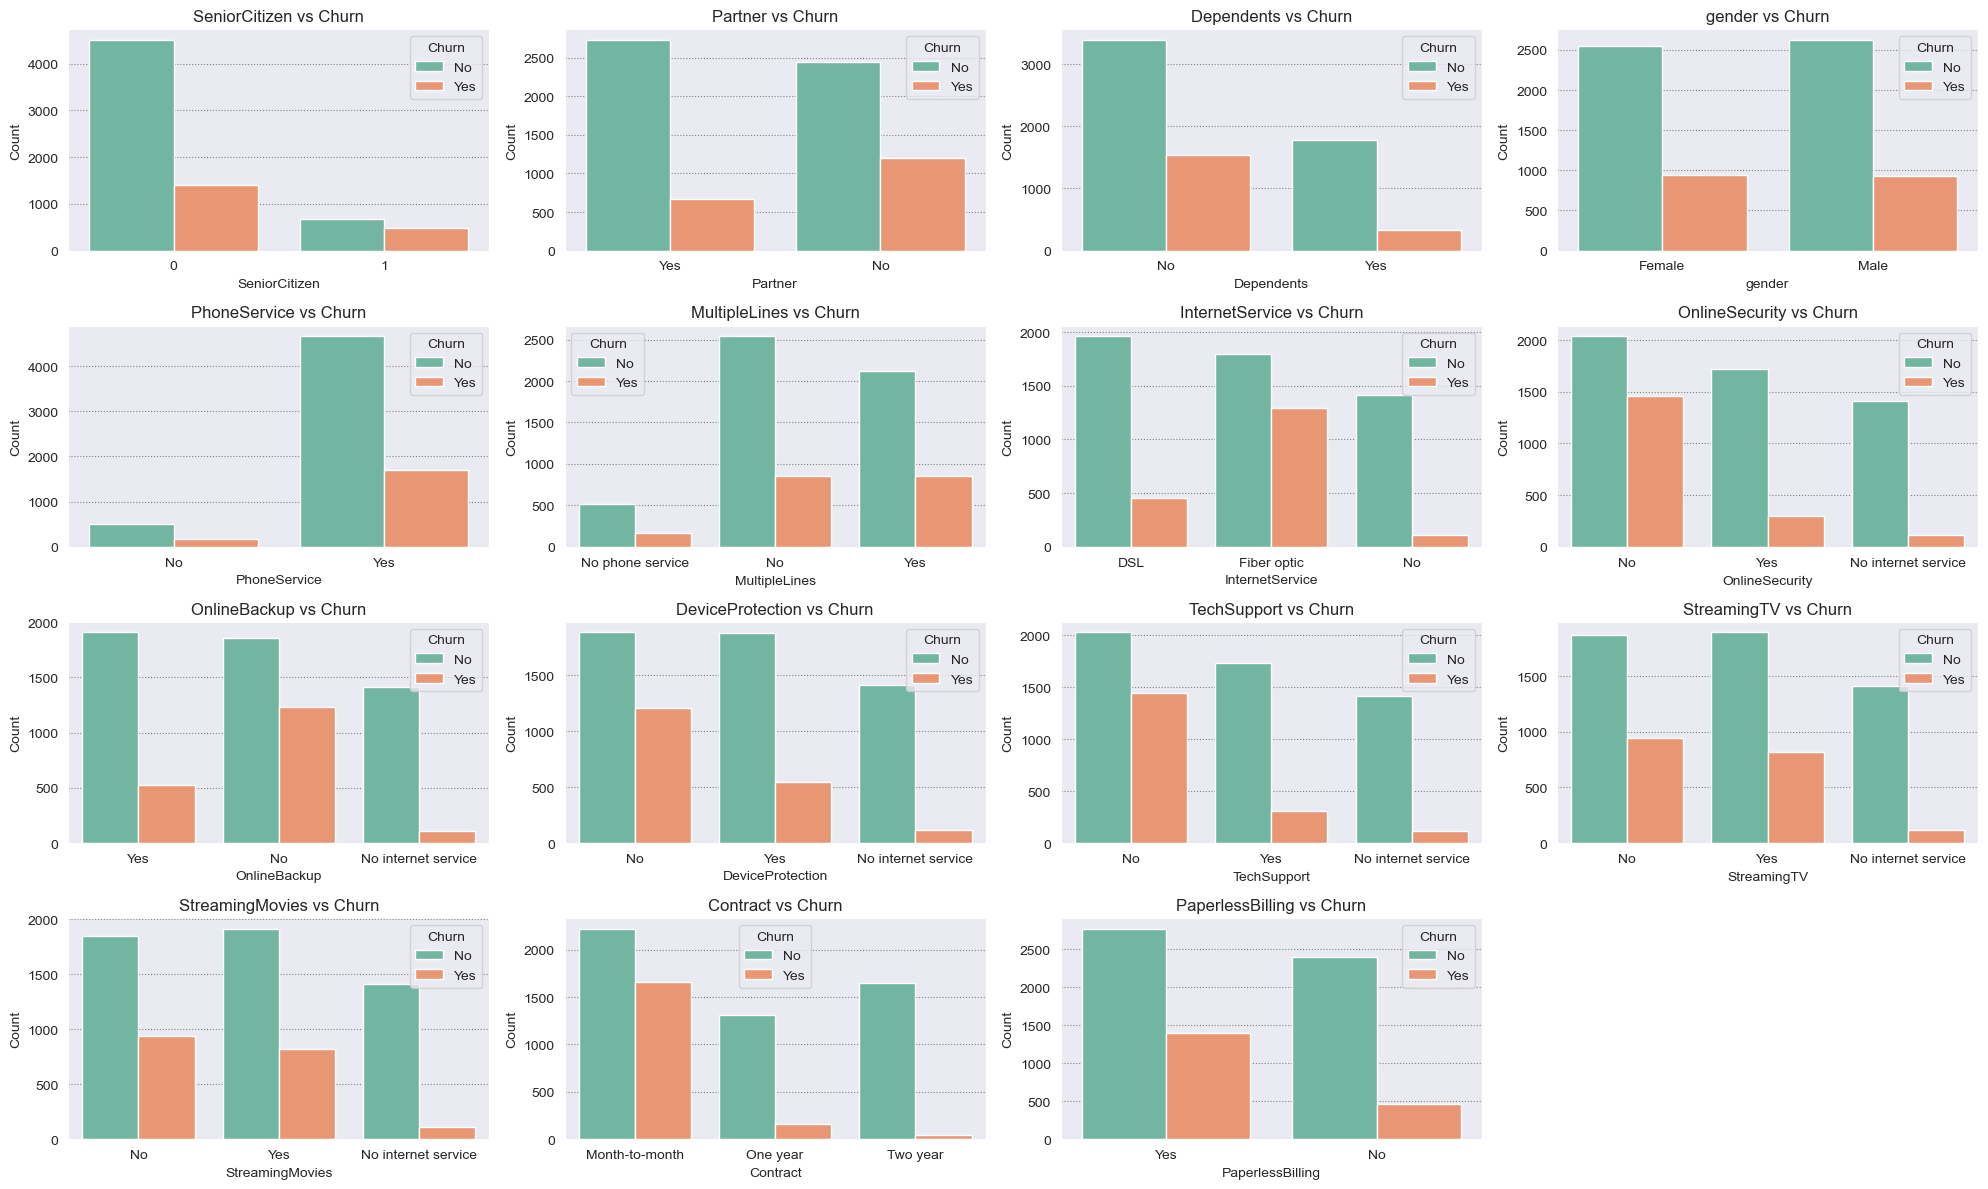

In [22]:
# Definindo as colunas que queremos plotar, incluindo a variável alvo Churn
columns_to_plot = ['SeniorCitizen', 'Partner', 'Dependents', 'gender', 'PhoneService',
                   'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling']

# Calcular o número de linhas e colunas baseado no total de variáveis
num_cols = 4  # Definindo 4 colunas
num_rows = (len(columns_to_plot) + num_cols - 1) // num_cols  # Número de linhas necessárias

# Configurando a grade de subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 12))

# Configurando o estilo do grid
sns.set_style("darkgrid", {"grid.color": ".5", "grid.linestyle": ":"})
# Usando a paleta 'Set2'
sns.set_palette("Set2")

# Gerar os gráficos para cada variável em relação ao Churn
for i, column in enumerate(columns_to_plot):
    ax = axes[i // num_cols, i % num_cols]  # Posicionar na grade
    sns.countplot(x=column, hue='Churn', data=df, ax=ax)  # Usar hue para Churn
    ax.set_title(f'{column} vs Churn')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

# Remover eixos não usados (caso o número de gráficos não complete a grade)
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes.flatten()[j])

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()

Nesta visualização, podemos analisar as variáveis relacionadas com a possibilidade ou não de Churn. Alguns serviços como Device Protection, Online Backup, Online Security, Tech Support e Internet Service, quando a pessoa não possui algum deles, a chance de Churn é maior. Além de contratos mensais também possuírem maior chance de Churn. 

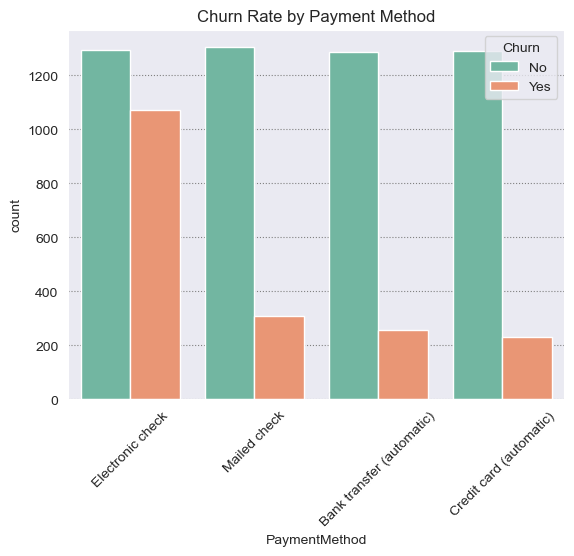

In [23]:
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Churn Rate by Payment Method')
plt.xticks(rotation=45)
plt.show()

Neste gráfico, podemos perceber que a maior chance de Churn é para pagamentos em Cheques Eletrônicos, o que causa um problema, pois ao mesmo tempo, é a preferência de método de pagamento dos clientes dessa empresa. 

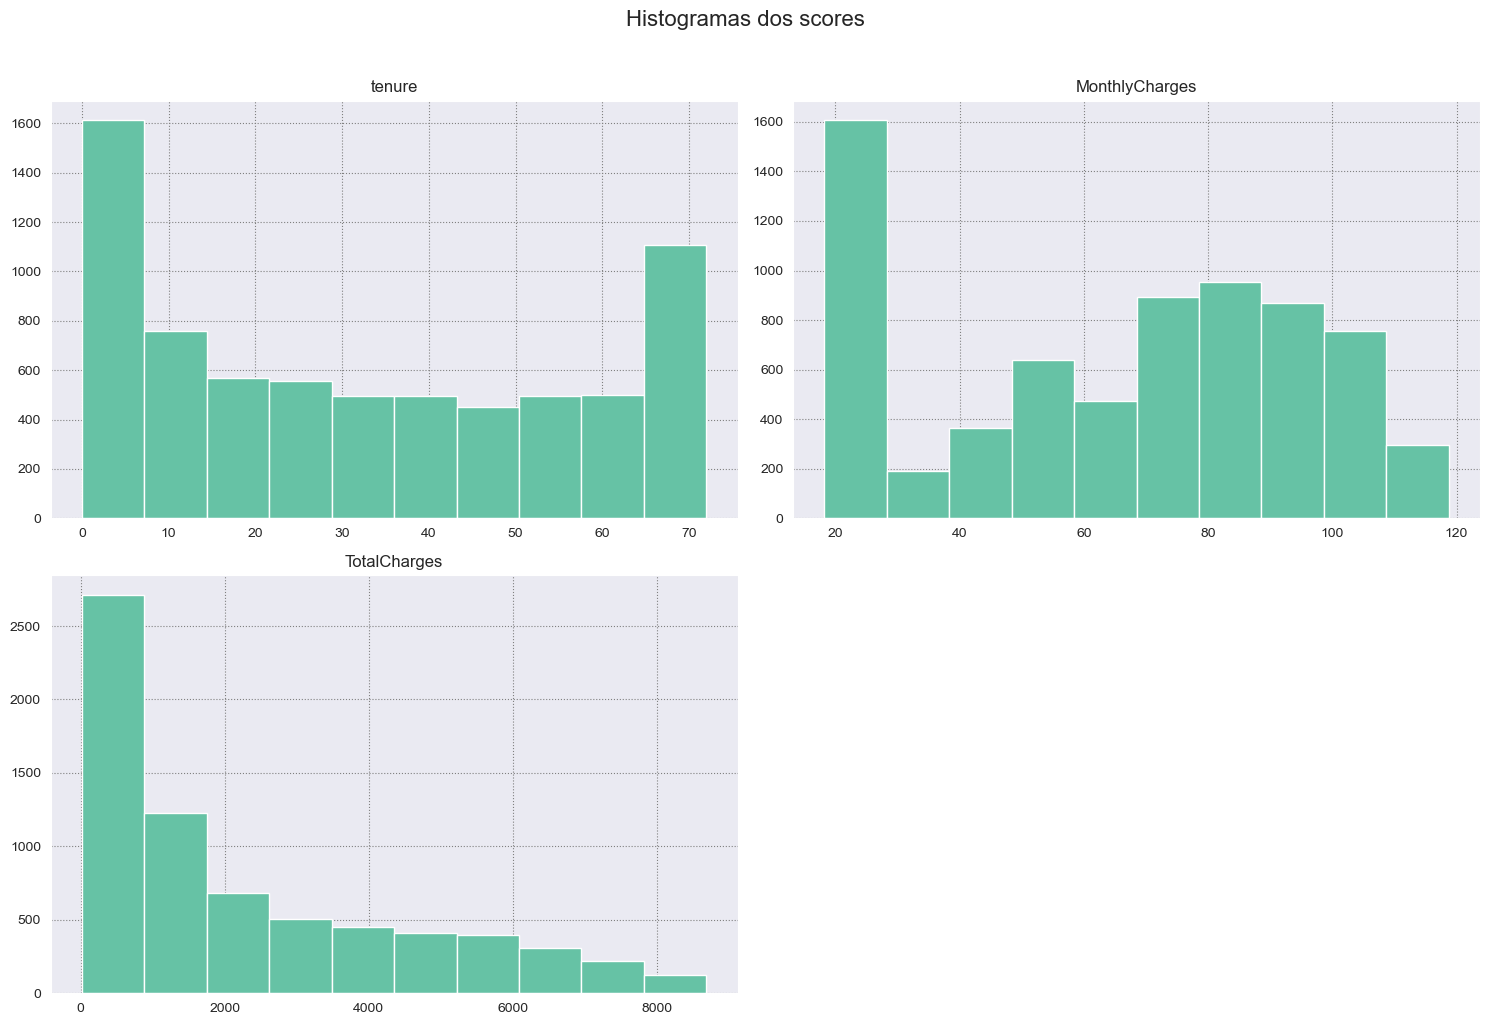

In [24]:
# Gera os histogramas
axarr = df[['tenure', 'MonthlyCharges', 'TotalCharges']].hist(figsize=(15, 10))

# Adiciona um título geral para a figura
plt.gcf().suptitle("Histogramas dos scores", fontsize=16, y=1.02)

plt.tight_layout()
plt.show()

Aqui, fiz histogramas das variáveis numéricas para analisar a distribuição dos dados. Verifica-se, portanto, que temos uma distribuição assimétrica para essas variáveis. Isso ajuda na decisão de Normalização ou Padronização dos dados. 

## 3. Preparação para o modelo

In [25]:
#Verificação das variáveis object para realizar o Label Encoder
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int32  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [26]:
le = LabelEncoder()

# Identificando colunas do tipo object
object_columns = df.select_dtypes(include=['object']).columns.tolist()

# Aplicando o LabelEncoder em cada coluna do tipo object
for column in object_columns:
    df[column] = le.fit_transform(df[column])

# Exibindo as primeiras linhas do DataFrame para verificar as mudanças
print(df.head())

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 

In [27]:
df[['TotalCharges', 'MonthlyCharges', 'tenure']].describe()

,TotalCharges,MonthlyCharges,tenure
count,7043.000000,7043.000000,7043.000000
mean,2283.300441,64.761692,32.371149
std,2265.000258,30.090047,24.559481
min,18.800000,18.250000,0.000000
25%,402.225000,35.500000,9.000000
50%,1400.550000,70.350000,29.000000
75%,3786.600000,89.850000,55.000000
max,8684.800000,118.750000,72.000000


In [28]:
# Excluindo a coluna 'Churn' do X
X = df.drop('Churn', axis=1)

y = df['Churn']  # Target

# Dividir os dados em conjuntos de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Instanciar o StandardScaler
scaler = StandardScaler()

# Colunas que precisam ser escaladas
columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Ajustar o scaler no conjunto de treino e transformar
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

# Usar o scaler ajustado no conjunto de teste
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

## 4. Criação de modelos

### Random Forest Classifier

In [30]:
# Inicializar o modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinar o modelo
rf_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = rf_model.predict(X_test)

In [31]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Exibir resultados
print("Acurácia do modelo:", accuracy)
print("\nMatriz de Confusão:\n", conf_matrix)
print("\nRelatório de Classificação:\n", class_report)

Acurácia do modelo: 0.7920511000709723

Matriz de Confusão:
 [[942  94]
 [199 174]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.47      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



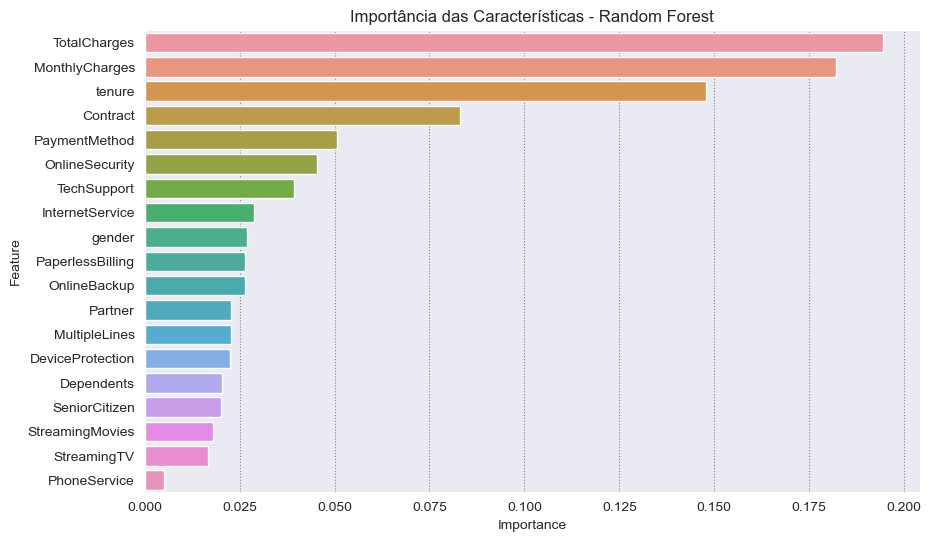

In [32]:
# Ajustar o modelo Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Obter a importância das características
importances = rf.feature_importances_
feature_names = X_train.columns

# Criar um DataFrame com a importância
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotar a importância
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Importância das Características - Random Forest')
plt.show()

Aqui podemos verificar que as features mais importantes são as numéricas, ou seja, o valor cobrado mensalmente, juntamente com o valor total da compra, impactam diretamente no Churn. 

### Balanced Random Forest

In [33]:
rfc = RandomForestClassifier(random_state=1234)

# Treinando o modelo
rfc.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = rfc.predict(X_test)

# Avaliando a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy}")

# Exibindo a matriz de confusão
print(confusion_matrix(y_test, y_pred))

# Exibindo um relatório de classificação completo
print(classification_report(y_test, y_pred))

Acurácia: 0.794180269694819
[[939  97]
 [193 180]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.48      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



### XGBoost

In [34]:
# Criar o modelo XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Fazer previsões
xgb_predictions = xgb_model.predict(X_test)

# Avaliar o modelo
print("Accuracy of XGBoost:", accuracy_score(y_test, xgb_predictions))
print(classification_report(y_test, xgb_predictions))

Accuracy of XGBoost: 0.7821149751596878
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1036
           1       0.61      0.50      0.55       373

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



c:\Users\samsung\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:08:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


### SVM

In [45]:
# Criando e treinando o modelo SVM
svm_model = SVC(kernel='linear')  # Você pode experimentar diferentes kernels, como 'rbf' ou 'poly'
svm_model.fit(X_train, y_train)

# Realizando previsões
y_pred = svm_model.predict(X_test)

# Avaliando o modelo
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[934 102]
 [156 217]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409


Accuracy: 0.8168914123491838


### Light GBM

In [35]:
# Criar o modelo LightGBM
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

# Fazer previsões
lgb_predictions = lgb_model.predict(X_test)

# Avaliar o modelo
print("Accuracy of LightGBM:", accuracy_score(y_test, lgb_predictions))
print(classification_report(y_test, lgb_predictions))

[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000564 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 627
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265531 -> initscore=-1.017418
[LightGBM] [Info] Start training from score -1.017418
Accuracy of LightGBM: 0.8034066713981547
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.66      0.54      0.59       373

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



In [36]:
# Definir um grid de hiperparâmetros mais restrito
param_grid = {
    'num_leaves': [31, 50],         # Número de folhas
    'learning_rate': [0.1, 0.01],   # Taxa de aprendizado
    'n_estimators': [50, 100],      # Número de árvores
    'max_depth': [10, -1]           # Profundidade máxima
}

# Configurar o Grid Search
grid_search = GridSearchCV(estimator=lgb.LGBMClassifier(), 
                           param_grid=param_grid, 
                           scoring='accuracy', 
                           cv=3,  # Validação cruzada com 3 folds
                           verbose=1, 
                           n_jobs=-1)  # Usar todos os núcleos disponíveis

# Ajustar o Grid Search aos dados
grid_search.fit(X_train, y_train)

# Exibir os melhores parâmetros e o melhor desempenho
print("Melhores parâmetros encontrados:", grid_search.best_params_)
print("Melhor acurácia encontrada:", grid_search.best_score_)

# Fazer previsões com o melhor modelo encontrado
best_lgb_model = grid_search.best_estimator_
lgb_predictions = best_lgb_model.predict(X_test)

# Avaliar o modelo
print("Accuracy of LightGBM after Grid Search:", accuracy_score(y_test, lgb_predictions))
print(classification_report(y_test, lgb_predictions))


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 627
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265531 -> initscore=-1.017418
[LightGBM] [Info] Start training from score -1.017418
Melhores parâmetros encontrados: {'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 50, 'num_leaves': 31}
Melhor acurácia encontrada: 0.7939297124600638
Accuracy of LightGBM after Grid Search: 0.8062455642299503
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.66      0.54      0.60       373

    

Melhor Threshold: 0.2970342826515829
Taxa de Falsos Positivos (FPR): 0.23
Taxa de Verdadeiros Positivos (TPR): 0.77


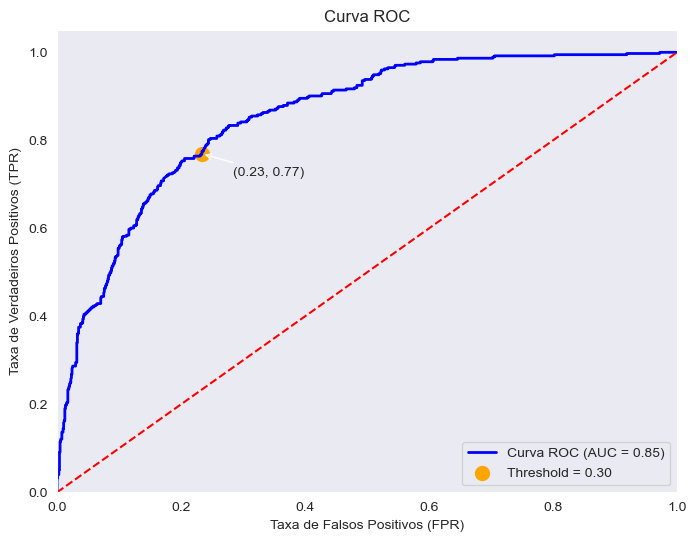

In [37]:
# Obter as probabilidades de previsão para a classe positiva
y_pred_prob = best_lgb_model.predict_proba(X_test)[:, 1]

# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calcular a AUC
roc_auc = auc(fpr, tpr)

# Definir o threshold a ser destacado (exemplo: o melhor threshold encontrado)
best_threshold = 0.2970342826515829  # Substitua pelo seu threshold

# Encontrar o índice do threshold mais próximo
threshold_idx = (np.abs(thresholds - best_threshold)).argmin()

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Linha de chance

# Adicionar marcador para o threshold
plt.scatter(fpr[threshold_idx], tpr[threshold_idx], color='orange', s=100, label='Threshold = {:.2f}'.format(best_threshold))
plt.annotate('({:.2f}, {:.2f})'.format(fpr[threshold_idx], tpr[threshold_idx]),
             xy=(fpr[threshold_idx], tpr[threshold_idx]),
             xytext=(fpr[threshold_idx] + 0.05, tpr[threshold_idx] - 0.05),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid()

# Imprimir o valor do threshold
print("Melhor Threshold:", best_threshold)
print("Taxa de Falsos Positivos (FPR): {:.2f}".format(fpr[threshold_idx]))
print("Taxa de Verdadeiros Positivos (TPR): {:.2f}".format(tpr[threshold_idx]))

plt.show()

In [38]:
# Classificar com base no novo threshold
lgb_final_predictions = (y_pred_prob >= best_threshold).astype(int)

# Avaliar o modelo com o novo threshold
accuracy = accuracy_score(y_test, lgb_final_predictions)
print("Acurácia com o novo threshold:", accuracy)
print("Matriz de Confusão:\n", confusion_matrix(y_test, lgb_final_predictions))
print("Relatório de Classificação:\n", classification_report(y_test, lgb_final_predictions))


Acurácia com o novo threshold: 0.7672107877927609
Matriz de Confusão:
 [[794 242]
 [ 86 287]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.90      0.77      0.83      1036
           1       0.54      0.77      0.64       373

    accuracy                           0.77      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.77      0.78      1409



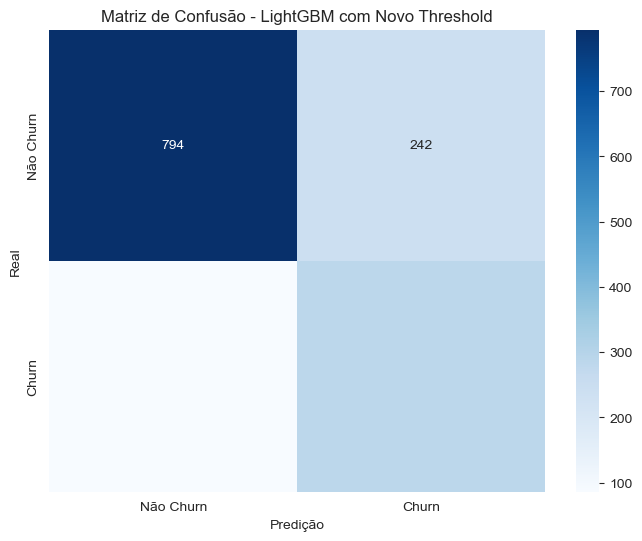

In [39]:
# Calcular a matriz de confusão
cm = confusion_matrix(y_test, lgb_final_predictions)

# Plotar a matriz de confusão em heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Não Churn', 'Churn'], 
            yticklabels=['Não Churn', 'Churn'], cbar=True)
plt.xlabel('Predição')
plt.ylabel('Real')
plt.title('Matriz de Confusão - LightGBM com Novo Threshold')
plt.show()

### Logistic Regression

In [40]:
# Criando e treinando o modelo de Regressão Logística
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Realizando previsões
y_pred = log_reg.predict(X_test)

# Avaliando o modelo
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[934 102]
 [156 217]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409


Accuracy: 0.8168914123491838


In [41]:

# Aplicar validação cruzada
cv_scores = cross_val_score(log_reg, X, y, cv=5, scoring='accuracy')  # 5 folds
print("Acurácia média com validação cruzada:", cv_scores.mean())
print("Desvio padrão da acurácia com validação cruzada:", cv_scores.std())

# Treinar o modelo com todos os dados de treino
log_reg.fit(X_train, y_train)

# Fazer previsões
log_reg_predictions = log_reg.predict(X_test)


Acurácia média com validação cruzada: 0.8024991531711724
Desvio padrão da acurácia com validação cruzada: 0.006331379392752346


In [42]:
# Definir o grid de hiperparâmetros ajustado
param_grid = [
    {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l2'], 'solver': ['lbfgs', 'newton-cg', 'saga'], 'tol': [1e-4, 1e-3], 'max_iter': [100, 200]},
    {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1'], 'solver': ['liblinear', 'saga'], 'tol': [1e-4, 1e-3], 'max_iter': [100, 200]},
]

# Configurar o Grid Search
grid_search = GridSearchCV(estimator=log_reg, 
                           param_grid=param_grid, 
                           scoring='accuracy', 
                           cv=3,  # Número de folds para validação cruzada
                           verbose=1, 
                           n_jobs=-1)  # Usar todos os núcleos disponíveis

# Ajustar o Grid Search aos dados
grid_search.fit(X_train, y_train)

# Exibir os melhores parâmetros e o melhor desempenho
print("Melhores parâmetros encontrados:", grid_search.best_params_)
print("Melhor acurácia encontrada:", grid_search.best_score_)

# Fazer previsões com o melhor modelo encontrado
best_model = grid_search.best_estimator_
log_reg_predictions = best_model.predict(X_test)

# Avaliar o modelo
print("Acurácia do melhor modelo:", accuracy_score(y_test, log_reg_predictions))
print(classification_report(y_test, log_reg_predictions))



Fitting 3 folds for each of 120 candidates, totalling 360 fits
Melhores parâmetros encontrados: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga', 'tol': 0.0001}
Melhor acurácia encontrada: 0.8017394391196309
Acurácia do melhor modelo: 0.8197303051809794
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1036
           1       0.69      0.57      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



Melhor Threshold: 0.2959359903050959


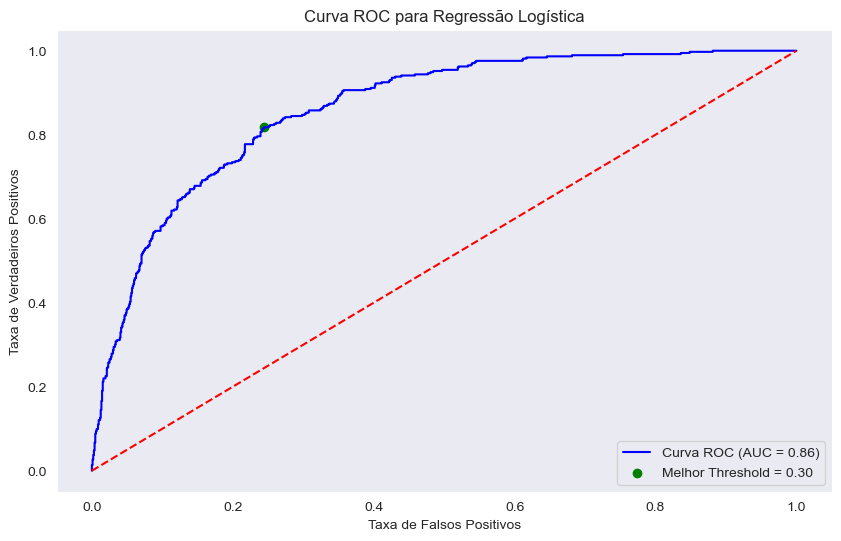

Confusion Matrix:
[[783 253]
 [ 68 305]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      1036
           1       0.55      0.82      0.66       373

    accuracy                           0.77      1409
   macro avg       0.73      0.79      0.74      1409
weighted avg       0.82      0.77      0.78      1409


Accuracy: 0.7721788502484032


In [43]:
# Obtendo as probabilidades de previsão
y_probs = log_reg.predict_proba(X_test)[:, 1]

# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Encontrando o melhor threshold (ponto de equilíbrio)
f1_scores = 2 * (tpr * (1 - fpr)) / (tpr + (1 - fpr))
best_threshold = thresholds[np.argmax(f1_scores)]
print("Melhor Threshold:", best_threshold)

# Plotando a curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Linha diagonal
plt.scatter(fpr[np.argmax(f1_scores)], tpr[np.argmax(f1_scores)], color='green', marker='o', 
            label='Melhor Threshold = {:.2f}'.format(best_threshold))
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Regressão Logística')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Avaliando o modelo com o melhor threshold
y_pred_best = (y_probs >= best_threshold).astype(int)

# Exibindo a matriz de confusão e o relatório de classificação
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))
print("\nAccuracy:", accuracy_score(y_test, y_pred_best))

### Comparação dos modelos

In [46]:
# Random Forest

# Prever no conjunto de teste
rf_predictions = rf_model.predict(X_test)

# Calcular métricas para o modelo Random Forest
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='weighted')  # 'weighted' para lidar com desbalanceamento
rf_recall = recall_score(y_test, rf_predictions, average='weighted')
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')

# XGBoost

xgb_predictions = xgb_model.predict(X_test)

xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_precision = precision_score(y_test, xgb_predictions, average='weighted')
xgb_recall = recall_score(y_test, xgb_predictions, average='weighted')
xgb_f1 = f1_score(y_test, xgb_predictions, average='weighted')

#LightGBM

lgb_predictions = lgb_model.predict(X_test)

lgb_accuracy = accuracy_score(y_test, lgb_predictions)
lgb_precision = precision_score(y_test, lgb_predictions, average='weighted')
lgb_recall = recall_score(y_test, lgb_predictions, average='weighted')
lgb_f1 = f1_score(y_test, lgb_predictions, average='weighted')

#Logistic Regression

# Prever no conjunto de teste com o modelo de Regressão Logística
log_reg_predictions = log_reg.predict(X_test)

# Calcular métricas para o modelo de Regressão Logística
log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)
log_reg_precision = precision_score(y_test, log_reg_predictions, average='weighted')
log_reg_recall = recall_score(y_test, log_reg_predictions, average='weighted')
log_reg_f1 = f1_score(y_test, log_reg_predictions, average='weighted')


# Prever no conjunto de teste com o modelo SVM
svm_predictions = svm_model.predict(X_test)

# Calcular métricas para o modelo SVM
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions, average='weighted')
svm_recall = recall_score(y_test, svm_predictions, average='weighted')
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')



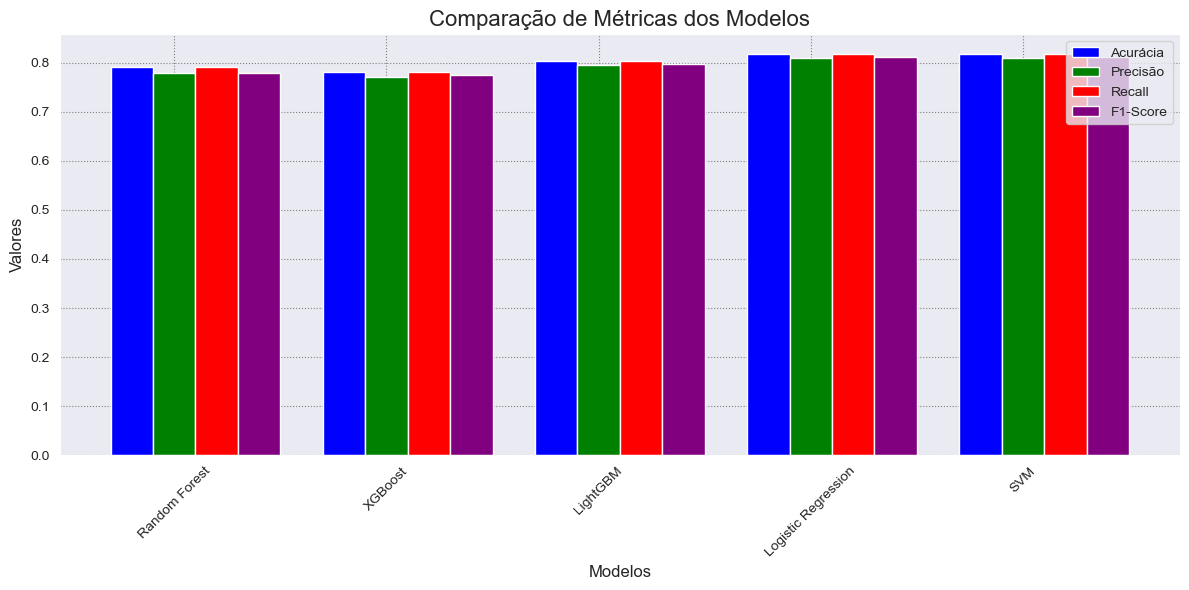

In [47]:
# Nomes dos modelos
model_names = ['Random Forest', 'XGBoost', 'LightGBM', 'Logistic Regression', 'SVM']

# Métricas para cada modelo (exemplo)
accuracy = [rf_accuracy, xgb_accuracy, lgb_accuracy, log_reg_accuracy, svm_accuracy]
precision = [rf_precision, xgb_precision, lgb_precision, log_reg_precision, svm_precision]
recall = [rf_recall, xgb_recall, lgb_recall, log_reg_recall, svm_recall]
f1_score = [rf_f1, xgb_f1, lgb_f1, log_reg_f1, svm_f1]

# Criando o gráfico de barras agrupadas
x = np.arange(len(model_names))  # A posição dos grupos no eixo x
width = 0.2  # Largura das barras

# Criando as barras para cada métrica
plt.figure(figsize=(12, 6))
plt.bar(x - width, accuracy, width, label='Acurácia', color='blue')
plt.bar(x, precision, width, label='Precisão', color='green')
plt.bar(x + width, recall, width, label='Recall', color='red')
plt.bar(x + 2*width, f1_score, width, label='F1-Score', color='purple')

# Adicionando rótulos e título
plt.xlabel('Modelos', fontsize=12)
plt.ylabel('Valores', fontsize=12)
plt.title('Comparação de Métricas dos Modelos', fontsize=16)
plt.xticks(x, model_names, rotation=45)

# Adicionando legenda
plt.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.show()

## Considerações Finais + Insights

1. Observa-se que algumas variáveis como Serviço de Internet, Segurança Online, Backup Online, Proteção do Dispositivo e Suporte Técnico, são muito impactantes quando analisadas em conjunto com a possibilidade de ocorrer Churn. Caso o cliente não tenha um desses serviços, a chance de Churn ocorrer é muito alta. Portanto, uma das sugestões para a empresa, é incentivar uma maior aquisição para esses serviços demonstrando os benefícios que eles poderiam trazer ao cliente. 

2. Com relação ao tipo de contrato, verifica-se que em contratos mensais, há uma maior possibilidade de Churn, portanto, uma sugestão é deixar mais chamativa a proposta de contratos anuais ou de dois anos, ou seja, deixar com que as cobranças mensais desses contratos sejam menores. 

3. Para o método de pagamento, a maior parte dos clientes utiliza cheque digital, ao mesmo tempo, a maior chance de Churn é para quem utiliza cheque digital, pois não é um método automático. Uma sugestão é incentivar a troca do método de pagamento para os pagantes em cheque digital, com benefícios extras se isso ocorrer (poderia incluir serviços que diminuam a chance de Churn citados na primeira observação).

4. Agora, com relação aos modelos testados, testei diferentes modelos de Classificação, de diferentes formas. Inicialmente, testei sem normalizar ou padronizar os dados. Depois, testei normalizando os dados. E, por último, testei com a padronização dos dados numéricos contínuos (esta técnica apresentou o melhor desempenho para os modelos, portanto, foi a única que deixei no notebook). 

5. Na análise geral comparando os modelos, eles obtiveram métricas bem parecidas. Porém, para problemas de Churn, as métricas mais observadas foram a precisão e o recall. A precisão foi importante para analisar a correção de previsões positivas, o que é essencial para evitar ações de retenções desnecessárias para a empresa que podem aumentar os custos. O recall foi importante para garantir que conseguíssemos classificar a maioria dos churners verdadeiros, evitando a perda de clientes valiosos. 

6. Uma questão observada foi o comportamento dos modelos antes e depois dos ajustes de hiperparâmetros e com a inclusão do valor de threshold. Com os ajustes de hiperparâmetros, os modelos LightGBM e Logistic Regression apresentaram um aumento em métricas importantes e diminuição (pequena) em outras métricas. Os valores de recall para Churn tiveram porcentagens baixas mesmo com ajustes de hiperparâmetros, eles só aumentaram quando o valor de threshold foi calculado com a ajuda da curva ROC AUC, porém, com o recall aumentado, houve a diminuição da acurácia e da precisão. 

7. Para analisar estratégias e soluções para a empresa, o ideal seria calibrar as probabilidades previstas nos modelos para que elas correspondam às frequências reais observadas. Além disso, seria essencial realizar testes A/B para analisar quais medidas ou estratégias seriam mais eficientes para reduzir ou evitar churn de clientes no futuro. Essas são ideias que não foram implementadas pois demandariam mais tempo de análise e estudo para execução. 